# Read csv files and plot learning curves for FedAvg experiment 3b

In [1]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import os
from os import walk
from os.path import join
os.getcwd()

'C:\\Users\\wangyuan\\myfl-1\\Federated-Learning-PyTorch'

In [3]:
file_path_1 = 'save\\figures-cifar\\data_src_exp_3b'
_, _, filenames_1 = next(walk(file_path_1))
files_to_read_1 = [join(file_path_1,f) for f in filenames_1]
df_1 = [pd.read_csv(f) for f in files_to_read_1]

In [4]:
# manually set the label names
run_labels=[0]*7
run_labels[0] = 'SGD, $\eta=0.005$'
run_labels[1] = 'FedAvg, $E=5$, $C=0$, $\eta=0.02$'
run_labels[2] = 'FedAvg, $E=1$, $C=0.1$, $\eta=0.1$'
run_labels[3] = 'FedAvg, $E=5$, $C=0.1$, $\eta=0.1$'
run_labels[4] = 'FedAvg, $E=10$, $C=0.1$, $\eta=0.2$'
run_labels[5] = 'FedAvg, $E=20$, $C=0.1$, $\eta=0.2$'
run_labels[6] = 'FedAvg, $E=5$, $C=1.0$, $\eta=0.32$'

# define linestyle and color
run_colors, run_linestyles = [0]*7, [0]*7

run_colors[0] = 'deeppink'
run_colors[1] = 'limegreen'
run_colors[2] = 'orange'
run_colors[3] = 'orange'
run_colors[4] = 'dodgerblue'
run_colors[5] = 'dodgerblue'
run_colors[6] = 'lightslategrey'

run_linestyles[0] = '-'
run_linestyles[1] = '-'
run_linestyles[2] = '-'
run_linestyles[3] = '--'
run_linestyles[4] = '-.'
run_linestyles[5] = ':'
run_linestyles[6] = '-'

# define the x-axle scaling factor to allow for comparison in minibatch update amount
xsf = [0]*7
xsf[0]=1000
xsf[1]=50
xsf[2]=100
xsf[3]=500
xsf[4]=1000
xsf[5]=2000
xsf[6]=5000

### choosing color and linestyle
Please see https://matplotlib.org/stable/gallery/color/named_colors.html and https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

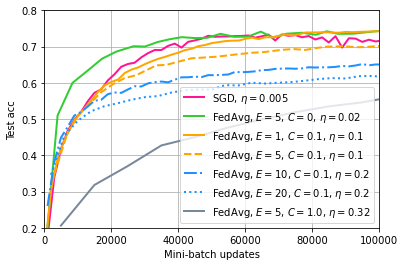

In [14]:
# plot the first figure for experiment 2 with iid data 
step_1=5
plt.figure()
for i, data in enumerate(df_1):
#     if i==6:
#         step_1 = 1
#     else:
#         step_1 = 5
    if i==0:
        step_1 = 2
    elif i==1:
        step_1 = 40
    elif i==2:
        step_1 = 20
    elif i==3:
        step_1 = 4
    else:
        step_1 = 2        
    x = [dx*xsf[i] for j, dx in enumerate(data['Step'].tolist()) if j % step_1 == 0]
    y = [dy for j, dy in enumerate(data['Value'].tolist()) if j % step_1 == 0]   
    x.append(data['Step'].tolist()[-1] * xsf[i])
    y.append(data['Value'].tolist()[-1]) 
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i],linewidth=2)
    plt.legend(loc='lower right')
plt.grid()
# plt.tight_layout()
plt.xlim(0,100000)
plt.ylim(0.2,0.8)
plt.xlabel('Mini-batch updates')
plt.ylabel('Test acc')
plt.savefig('save\\figures-cifar\\fedavg-exp-3b.png')